In [81]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

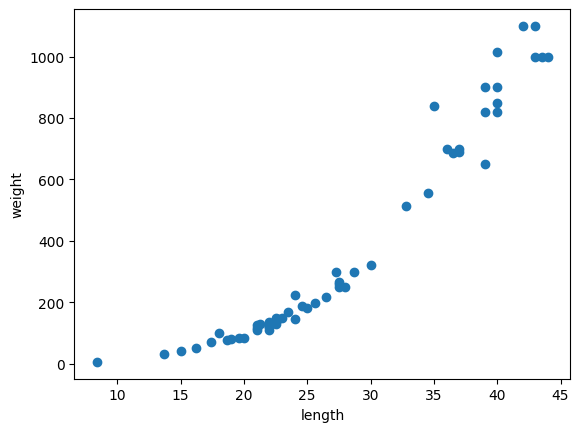

In [82]:
import matplotlib.pyplot as plt

X = perch_length
Y = perch_weight

plt.scatter(X,Y)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [83]:
len(perch_length)
len(perch_weight)
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [84]:
### 책 내용

random_state를 42라는 계수를 줘서 42개 + 14개로 나눠지게 진행
PolynomialFeatures는 다항회귀로 선형회귀로 해결할 수 없는 경우에 사용한다.
fit을 해야 transform이 가능합니다. 

In [133]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
    
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [134]:
print(train_input)
print(test_input)
print(train_target)
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [135]:
print(train_input.shape, test_input.shape)

print(train_target.shape, test_target.shape)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

(42,) (14,)
(42,) (14,)


In [136]:
from sklearn.neighbors import KNeighborsRegressor
#하이퍼파라미터 튜닝
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(train_input, train_target)


KNeighborsRegressor()

In [137]:
print(knr.predict([[1]]))

[60.]


In [138]:
knr.score(test_input, test_target)

0.992809406101064

In [139]:
knr.score(train_input, train_target)

0.9698823289099254

In [140]:
t_input = test_input[2].reshape(-1,1)
p = knr.predict(t_input)

print(f"예측 사용 무게 : {p}")
print(f"실 무게 : {test_target[2]}")

예측 사용 무게 : [248.]
실 무게 : 250.0


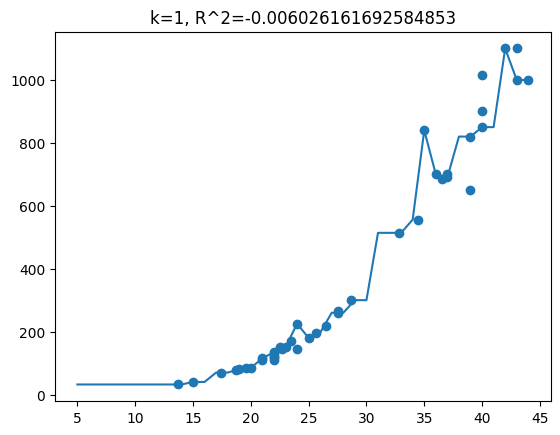

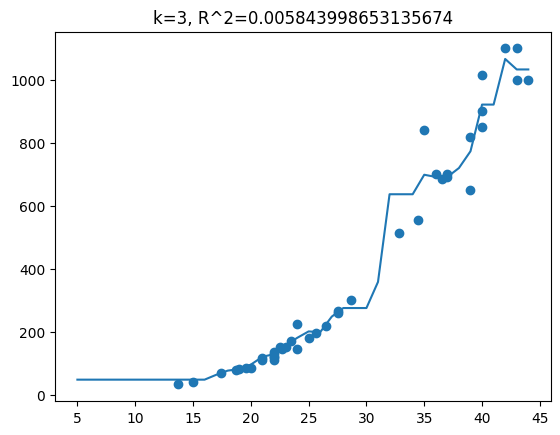

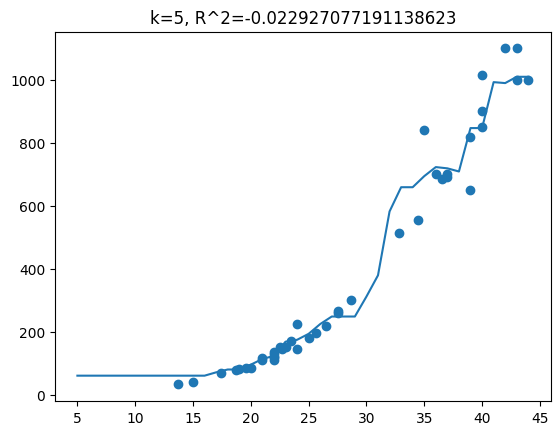

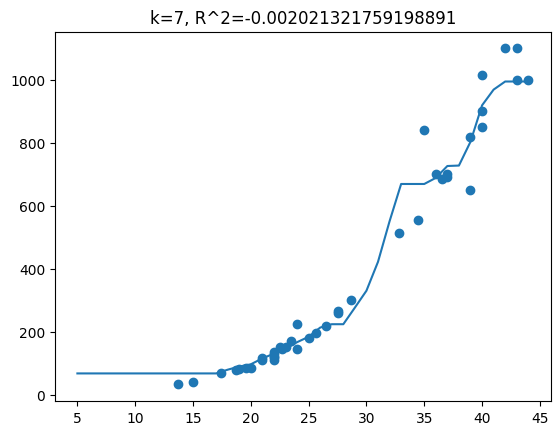

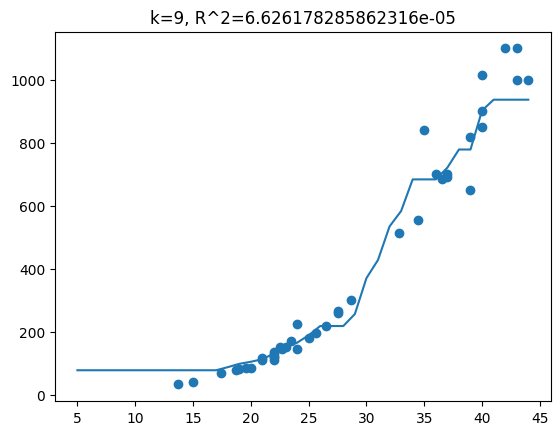

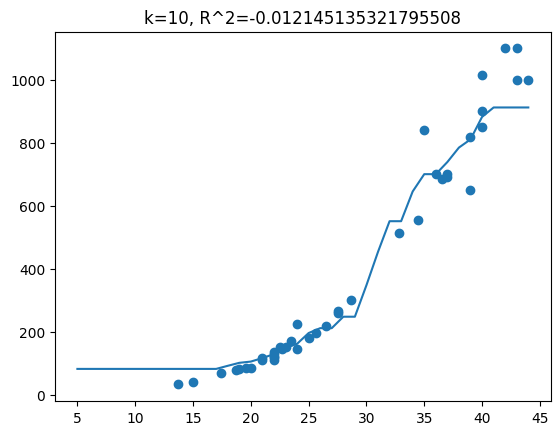

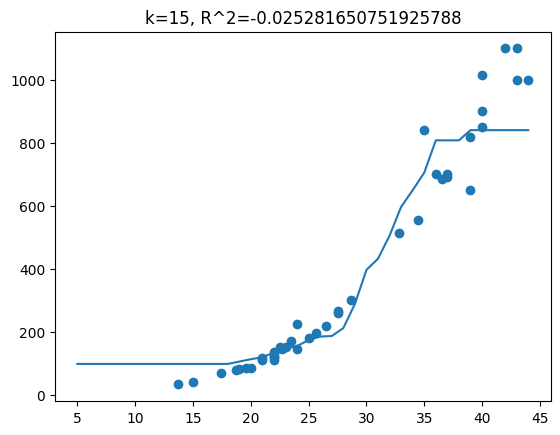

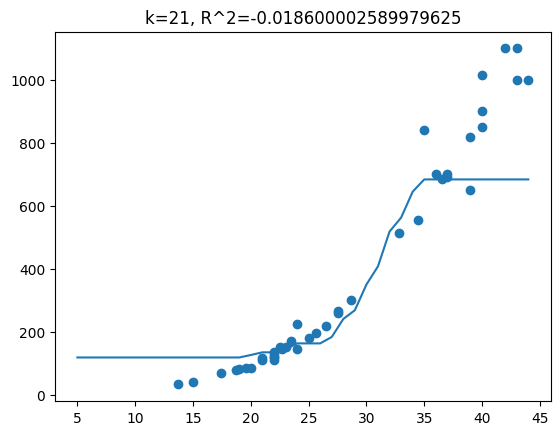

In [153]:
### 그래프로 그려보기
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for k in [1,3,5,7,9,10,15,21]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    # 결정R^2
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)
    
    plt.title(f'k={k}, R^2={s_train-s_test}')
    plt.scatter(train_input, train_target)
    plt.plot(x,prediction)
    plt.show()

In [159]:
knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.predict([[44]]))
print(knr.predict([[45]]))
print(knr.predict([[46]]))
print(knr.predict([[47]]))
print(knr.predict([[48]]))
print(knr.predict([[49]]))
print(knr.predict([[100]]))


[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]


In [190]:
from sklearn.model_selection import train_test_split
#훈련 세트와 테스트 세튼로 나눕다다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#훈련 세트와 테스트 세트를 2차원 배열로 나눕다다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
#하이퍼파라미터 튜닝
w= 45
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[41]]))
print(knr.predict([[42]]))
print(knr.predict([[43]]))
print(knr.predict([[44]]))
print(knr.predict([[45]]))

[921.66666667]
[1066.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]


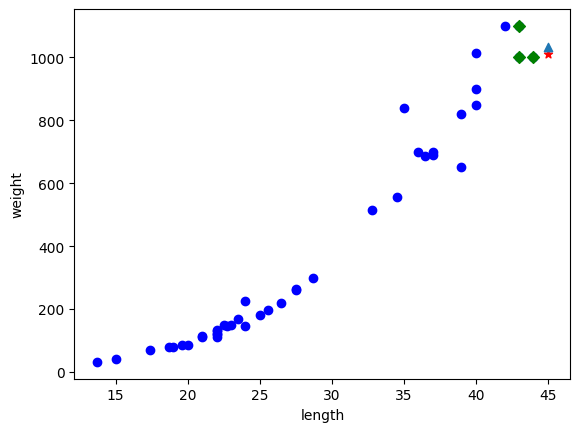

In [193]:
### 이웃을 찾아 차크로 그리기
d,i = knr.kneighbors([[w]])
plt.scatter(train_input, train_target, color='blue')
plt.scatter(train_input[i], train_target[i], color='green', marker='D')
plt.scatter(w,1010, marker='*', color='red')
plt.scatter(w, knr.predict([[w]])[0], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#knr.fit(train_input, train_target)
#prediction = knr.predict(x)

# 결정R^2
##s_train = knr.score(train_input, train_target)
#s_test = knr.score(test_input, test_target)
    
#plt.title(f'k={k}, R^2={s_train-s_test}')
#plt.scatter(train_input, train_target)
#plt.plot(x,prediction)
#plt.show()